1.) (5 points): If you are not familiar with this kind of scenario, but you were hired for this job in the real world, you would need to learn about it. Find two resources on the internet that are reliable and of good research quality (no forums, blogs, videos, social media, etc...)

-https://www.commonwealthfund.org/

-https://www.ahrq.gov/

2.) (5 points): Download this dataset and assess it using ISLP 3.3 and 3.4 (like how you did for homework 3).

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
frame = pd.read_csv('FY_2025_Hospital_Readmissions_Reduction_Program_Hospital.csv')

In [6]:
print(frame)

                                Facility Name  Facility ID State  \
0             SOUTHEAST HEALTH MEDICAL CENTER        10001    AL   
1             SOUTHEAST HEALTH MEDICAL CENTER        10001    AL   
2             SOUTHEAST HEALTH MEDICAL CENTER        10001    AL   
3             SOUTHEAST HEALTH MEDICAL CENTER        10001    AL   
4             SOUTHEAST HEALTH MEDICAL CENTER        10001    AL   
...                                       ...          ...   ...   
18505  EXCEPTIONAL COMMUNITY HOSPITAL LUBBOCK       670327    TX   
18506  EXCEPTIONAL COMMUNITY HOSPITAL LUBBOCK       670327    TX   
18507  EXCEPTIONAL COMMUNITY HOSPITAL LUBBOCK       670327    TX   
18508  EXCEPTIONAL COMMUNITY HOSPITAL LUBBOCK       670327    TX   
18509  EXCEPTIONAL COMMUNITY HOSPITAL LUBBOCK       670327    TX   

                 Measure Name  Number of Discharges  Footnote  \
0           READM-30-AMI-HRRP                 296.0       NaN   
1          READM-30-CABG-HRRP                 151.0  

In [7]:
print(frame.dtypes)

Facility Name                  object
Facility ID                     int64
State                          object
Measure Name                   object
Number of Discharges          float64
Footnote                      float64
Excess Readmission Ratio      float64
Predicted Readmission Rate    float64
Expected Readmission Rate     float64
Number of Readmissions         object
Start Date                     object
End Date                       object
dtype: object


In [8]:
print(frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18510 entries, 0 to 18509
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Facility Name               18510 non-null  object 
 1   Facility ID                 18510 non-null  int64  
 2   State                       18510 non-null  object 
 3   Measure Name                18510 non-null  object 
 4   Number of Discharges        8340 non-null   float64
 5   Footnote                    6583 non-null   float64
 6   Excess Readmission Ratio    11927 non-null  float64
 7   Predicted Readmission Rate  11927 non-null  float64
 8   Expected Readmission Rate   11927 non-null  float64
 9   Number of Readmissions      11927 non-null  object 
 10  Start Date                  18510 non-null  object 
 11  End Date                    18510 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.7+ MB
None


In [9]:
print(frame.describe())

         Facility ID  Number of Discharges     Footnote  \
count   18510.000000           8340.000000  6583.000000   
mean   261770.055105            279.269904     3.187756   
std    164647.739172            266.018069     2.089167   
min     10001.000000              0.000000     1.000000   
25%    110073.000000            115.000000     1.000000   
50%    250048.000000            197.000000     5.000000   
75%    390133.000000            354.000000     5.000000   
max    670327.000000           4501.000000     7.000000   

       Excess Readmission Ratio  Predicted Readmission Rate  \
count              11927.000000                11927.000000   
mean                   1.001719                   14.995386   
std                    0.080547                    5.017854   
min                    0.477900                    1.674200   
25%                    0.956550                   12.533000   
50%                    0.998200                   16.060200   
75%                    1.04

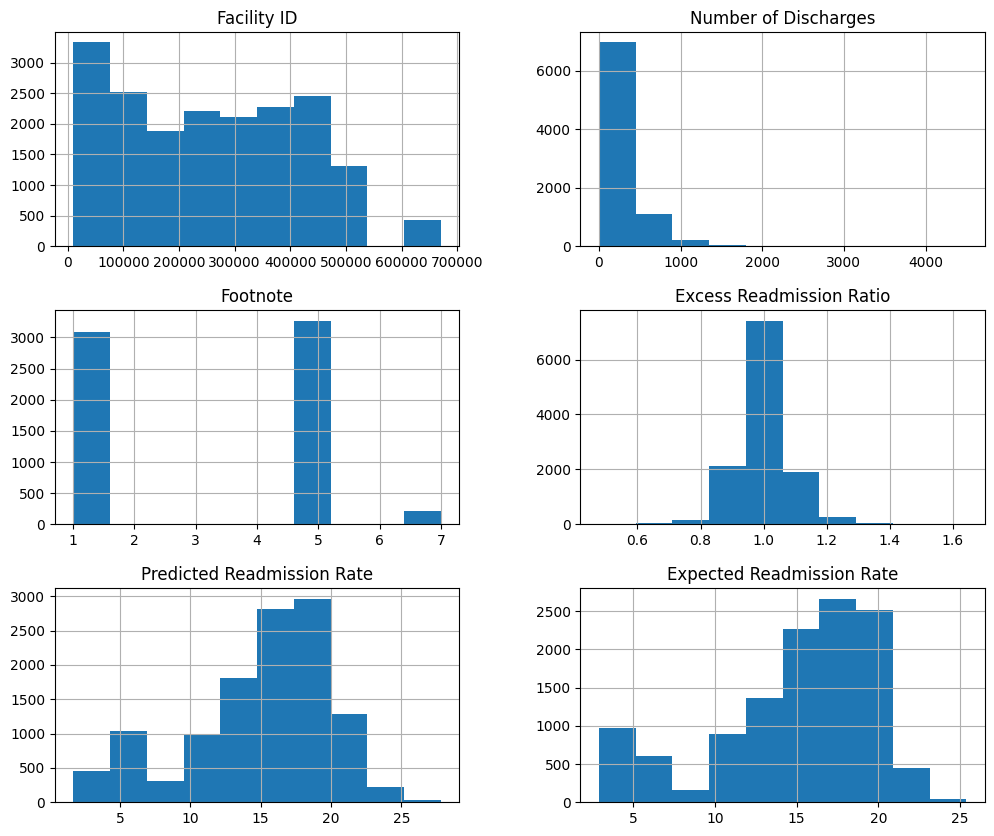

In [10]:
frame.hist(figsize=(12,10))
plt.show()

3.) (5 points): Describe each of the 12 variables in your own words, then mention the datatype of each.

Facility Name: Name of the hospital. Int. 

Facility ID: Unique ID tag for each hospital. String.

State: State the hospital resides in. String.

Measure Name: Looks like the naming code for each what type of discharge method/action. String.

Number of Discharges: Number of discharges for the Measure type. Int.

Footnote: From what it looks like. This column is used when there isn't any data for the row. So I'm assuming they're using this as a way
to explain why this data is empty. It may be due to not having the data or the data might be so little that it's insignificant for the set. String.

Excess Readmission Ratio: Our rate for how many readmissions we see against how many readmissions we expected to see. I'm assuming that we want to see less admissions then we predicted. So anything > 1.0 is above what we wanted. Float.

Predicted Readmission Rate: This looks like a percentage that represents the prediction for readmissions of the population. I'm assuming this is for the hosptial board's current data prediction model. float.

Expected Readmission Rate: This is a percentage that looks at past data as our benchmark for what our prediction model should be aiming for. float.

Number of Readmissions: So according to the data dictionary on the Hospital Readmission website. These are 30 day intervals of readmissions. 

Start Date: Start of the reporting period for this data set. datetime

End Date: End of the reporting period for this data set. datetime

4.) 5 points): Form your research question that can be answered by this dataset.

Can we predict which hospitals will get penalties because of high readmission rates. Focusing on Expected Readmission Rates > 1 for the HF tag by using the discharge valume and historical Expected Readmission Rates.

(5 points): Explain why your research question would be interesting to the board-- do not tailor your research question to me just because I'm your machine learning instructor. I'm interested in your model, but the board cares about money/patients. 

This question would help the board find high-risk patients for follow-up care. If they have a ERR > 1
they'll face Medicare penalties. This will indicate that care at these hospitals aren't up to par for heart failure pateints.

In [11]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))  # Bishop (2006), Eq. 4.59

class LogisticRegressionLasso:
    def __init__(self, alpha=0.1, lr=0.01, epochs=1000):
        self.alpha = alpha  # L1 penalty strength (Tibshirani, 1996)
        self.lr = lr        # Learning rate (optimization parameter)
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_model)  # Hastie et al. (2009)

            # Gradient of log-likelihood + L1 penalty (subgradient)
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y)) + self.alpha * np.sign(self.weights)  # Tibshirani (1996)
            db = (1 / n_samples) * np.sum(predictions - y)  # Bishop (2006)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

In [ ]:
Validation

NameError: name 'model' is not defined